<a href="https://colab.research.google.com/github/MarsineOmar/Telecom-cloud-/blob/main/PREDICTING_CUSTOMER_CHURN_FOR_A_TELECOM_COMPANY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
 
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
data.TotalCharges.replace([" "], ["0"], inplace= True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis= 1, inplace= True)
data.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [4]:
data = pd.get_dummies(data)

In [5]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)


In [7]:
model = Sequential()
model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)


Epoch 1/40
564/564 [==============================] - 2s 2ms/step - loss: 44.8314 - accuracy: 0.5716 - val_loss: 0.6790 - val_accuracy: 0.7424
Epoch 2/40
564/564 [==============================] - 1s 2ms/step - loss: 1.7253 - accuracy: 0.7255 - val_loss: 0.6164 - val_accuracy: 0.7424
Epoch 3/40
564/564 [==============================] - 1s 2ms/step - loss: 1.0442 - accuracy: 0.7287 - val_loss: 0.5880 - val_accuracy: 0.7424
Epoch 4/40
564/564 [==============================] - 1s 2ms/step - loss: 0.9983 - accuracy: 0.7329 - val_loss: 0.5768 - val_accuracy: 0.7424
Epoch 5/40
564/564 [==============================] - 1s 2ms/step - loss: 0.7262 - accuracy: 0.7315 - val_loss: 0.5735 - val_accuracy: 0.7424
Epoch 6/40
564/564 [==============================] - 1s 2ms/step - loss: 0.6165 - accuracy: 0.7254 - val_loss: 0.5718 - val_accuracy: 0.7424
Epoch 7/40
564/564 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.7379 - val_loss: 0.5714 - val_accuracy: 0.7424
Epoch

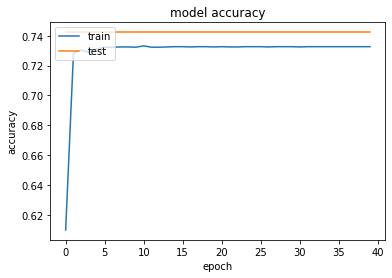

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
 
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
